In [351]:
import nltk, re, pprint
from nltk import word_tokenize
import urllib2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import sys #figure out what i need from this
import csv
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# How Can I use Data Science and Popular Novels to Improve my Own Novels?


## 1. Aquiring and cleaning novel text files

I aquired this novel from Project Gutenburg at http://www.gutenberg.org/. I then cleaned up the raw text by deleting every thing that wasn't part of the story including chapter headings and copy right information. This story is public domain. 

In [352]:
raw = open('wizardofoz_clean.txt').read()

In [353]:
type(raw)

unicode

In [354]:
len(raw)

205533

Use TextBlob to tokenize the raw text into sentences.

In [6]:
wizard = TextBlob(raw)

In [355]:
wizard_sentences = wizard.sentences

In [356]:
len(wizard_sentences)

2216

In [357]:
print wizard_sentences[2210:]

[Sentence("she cried, folding the little girl in her arms and
covering her face with kisses."), Sentence(""Where in the world did you come from?""), Sentence(""From the Land of Oz," said Dorothy gravely."), Sentence(""And here is Toto, too."), Sentence("And oh, Aunt Em!"), Sentence("I'm so glad to be at home again!"")]


Create csv file and add the sentences in a column.

In [358]:
wizardWriter = csv.writer(open('wizard_of_oz3.csv', 'w'), delimiter=',')

for sentence in wizard.sentences:
    wizardWriter.writerow([sentence])
    

Create dataframe using pandas.

In [359]:
df_wizard = pd.read_csv('wizard_of_oz3.csv', header=None)

In [360]:
df_wizard.head()

,0
0,Dorothy lived in the midst of the great Kansas...
1,"Their\nhouse was small, for the lumber to buil..."
2,"There were four walls, a floor and a roof, whi..."
3,Uncle Henry\nand Aunt Em had a big bed in one ...
4,"There was no garret at all, and no cellar--exc..."


In [361]:
df_wizard.rename(columns={ 0 : 'Sentences'}, inplace=True)

In [362]:
df_wizard.head()

,Sentences
0,Dorothy lived in the midst of the great Kansas...
1,"Their\nhouse was small, for the lumber to buil..."
2,"There were four walls, a floor and a roof, whi..."
3,Uncle Henry\nand Aunt Em had a big bed in one ...
4,"There was no garret at all, and no cellar--exc..."


In [363]:
df_wizard.tail()

,Sentences
2211,"""Where in the world did you come from?"""
2212,"""From the Land of Oz,"" said Dorothy gravely."
2213,"""And here is Toto, too."
2214,"And oh, Aunt Em!"
2215,"I'm so glad to be at home again!"""


## 2. Feature Creation 

### 2.1 Create wrd_length and total_char columns
wrd_length contains a list of lists, which contains the number of characters per word in each sentence. total_char contains the sum number of charactes in the sentence.

In [364]:
wrd_length = []
total_char = []

def wrd_char_counts(sentence):
    total_chars = 0 #characters in the sentence
    wrd_counts = [] # number of char per word in sentence
    for word in sentence:
        wrd = word
        char_count = len(wrd)
        wrd_counts.append(char_count)
        total_chars += char_count
    total_char.append(total_chars)
    wrd_length.append(wrd_counts)

This loop iterates through each sentence in the database and passes each sentence through TextBlob to be tokenized into words and then passes the sentences with its words through the wrd_char_counts function, which then creates the lists **wrd_length** and **total_char**.

In [365]:
for l in df_wizard['Sentences']:
    sent = TextBlob(l)
    wrd_char_counts(sent.words)

In [21]:
wrd_length[200:205]

[[3, 4, 6, 2, 4, 3, 4, 4, 3, 6, 5, 4, 3, 6, 3, 4, 2, 4, 2, 4, 4, 3, 5],
 [2, 4, 6, 7, 3, 5, 2, 3, 5, 3, 6, 5, 4, 3, 8, 2, 3, 5, 2, 3, 4],
 [1, 6, 2, 4, 4, 3, 2, 3, 4, 2, 4],
 [4, 5, 2, 4, 3, 5, 2, 4, 1, 4, 4, 2, 3, 4, 5, 3, 4, 3],
 [3,
  4,
  3,
  3,
  3,
  7,
  5,
  3,
  5,
  2,
  3,
  6,
  4,
  5,
  6,
  3,
  2,
  4,
  2,
  2,
  4,
  3,
  4,
  4,
  3,
  3]]

In [22]:
total_char[200:205]

[88, 85, 35, 62, 96]

Create columns named wrd_length and char_total filling them with the data created by the function and loop.

In [23]:
df_wizard['wrd_lengths'] = wrd_length

In [24]:
df_wizard['char_total'] = total_char

In [25]:
df_wizard.head()

,Sentences,wrd_lengths,char_total
0,Dorothy lived in the midst of the great Kansas...,"[7, 5, 2, 3, 5, 2, 3, 5, 6, 8, 4, 5, 5, 3, 3, ...",103
1,"Their\nhouse was small, for the lumber to buil...","[5, 5, 3, 5, 3, 3, 6, 2, 5, 2, 3, 2, 2, 7, 2, ...",69
2,"There were four walls, a floor and a roof, whi...","[5, 4, 4, 5, 1, 5, 3, 1, 4, 5, 4, 3, 4, 3, 4, ...",144
3,Uncle Henry\nand Aunt Em had a big bed in one ...,"[5, 5, 3, 4, 2, 3, 1, 3, 3, 2, 3, 6, 3, 7, 1, ...",75
4,"There was no garret at all, and no cellar--exc...","[5, 3, 2, 6, 2, 3, 3, 2, 6, 6, 1, 5, 4, 3, 2, ...",178


In [26]:
df_wizard.tail()

,Sentences,wrd_lengths,char_total
2211,"""Where in the world did you come from?""","[5, 2, 3, 5, 3, 3, 4, 4]",29
2212,"""From the Land of Oz,"" said Dorothy gravely.","[4, 3, 4, 2, 2, 4, 7, 7]",33
2213,"""And here is Toto, too.","[3, 4, 2, 4, 3]",16
2214,"And oh, Aunt Em!","[3, 2, 4, 2]",11
2215,"I'm so glad to be at home again!""","[1, 2, 2, 4, 2, 2, 2, 4, 5]",24


In [27]:
len(df_wizard['wrd_lengths'][0])

26

### 2.2 Create word_percent column
The function and loop divide each wrd_length by the char_total of its sentence. I wanted to see if this would be a good way to visually display the sentence patterns throughout the novel as compared to calculating the number of syllables per word. 

In [28]:
word_percent = []
def wrd_pattern(length, total):
    sent_wrd_pattern = []
    for l in length:
        wrd_ratio = float(l)/total
        sent_wrd_pattern.append(wrd_ratio)
    word_percent.append(sent_wrd_pattern)        

In [29]:
i = 0
j = 0
for m in df_wizard['Sentences']:
    length = df_wizard['wrd_lengths'][i]
    i += 1
    total = df_wizard['char_total'][j]
    j += 1
    wrd_pattern(length, total)

In [30]:
len(word_percent)

2216

In [31]:
test = word_percent[:1]

In [32]:
print test

[[0.06796116504854369, 0.04854368932038835, 0.019417475728155338, 0.02912621359223301, 0.04854368932038835, 0.019417475728155338, 0.02912621359223301, 0.04854368932038835, 0.05825242718446602, 0.07766990291262135, 0.038834951456310676, 0.04854368932038835, 0.04854368932038835, 0.02912621359223301, 0.02912621359223301, 0.009708737864077669, 0.05825242718446602, 0.02912621359223301, 0.038834951456310676, 0.019417475728155338, 0.02912621359223301, 0.02912621359223301, 0.02912621359223301, 0.05825242718446602, 0.019417475728155338, 0.038834951456310676]]


Runs the word_percent colomn through a loop that turns the lists into numpy arrays for better calculation. 

In [33]:
word_percent_array = []
for n in word_percent[:3]:
    n = np.array(n)
    print type(n)
    word_percent_array.append(n)
       

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [34]:
word_percent_arr = []
for n in word_percent:
    n = np.array(n)
    word_percent_arr.append(n)

In [35]:
for n in word_percent_arr[:3]:
    print n

[ 0.06796117  0.04854369  0.01941748  0.02912621  0.04854369  0.01941748
  0.02912621  0.04854369  0.05825243  0.0776699   0.03883495  0.04854369
  0.04854369  0.02912621  0.02912621  0.00970874  0.05825243  0.02912621
  0.03883495  0.01941748  0.02912621  0.02912621  0.02912621  0.05825243
  0.01941748  0.03883495]
[ 0.07246377  0.07246377  0.04347826  0.07246377  0.04347826  0.04347826
  0.08695652  0.02898551  0.07246377  0.02898551  0.04347826  0.02898551
  0.02898551  0.10144928  0.02898551  0.07246377  0.05797101  0.07246377]
[ 0.03472222  0.02777778  0.02777778  0.03472222  0.00694444  0.03472222
  0.02083333  0.00694444  0.02777778  0.03472222  0.02777778  0.02083333
  0.02777778  0.02083333  0.02777778  0.02777778  0.0625      0.00694444
  0.03472222  0.04861111  0.0625      0.00694444  0.05555556  0.02083333
  0.02083333  0.04166667  0.00694444  0.03472222  0.03472222  0.01388889
  0.02777778  0.04166667  0.02083333  0.02083333  0.02777778]


In [36]:
df_wizard['word_percent_arr'] = word_percent_arr

In [37]:
df_wizard.head()

,Sentences,wrd_lengths,char_total,word_percent_arr
0,Dorothy lived in the midst of the great Kansas...,"[7, 5, 2, 3, 5, 2, 3, 5, 6, 8, 4, 5, 5, 3, 3, ...",103,"[0.0679611650485, 0.0485436893204, 0.019417475..."
1,"Their\nhouse was small, for the lumber to buil...","[5, 5, 3, 5, 3, 3, 6, 2, 5, 2, 3, 2, 2, 7, 2, ...",69,"[0.0724637681159, 0.0724637681159, 0.043478260..."
2,"There were four walls, a floor and a roof, whi...","[5, 4, 4, 5, 1, 5, 3, 1, 4, 5, 4, 3, 4, 3, 4, ...",144,"[0.0347222222222, 0.0277777777778, 0.027777777..."
3,Uncle Henry\nand Aunt Em had a big bed in one ...,"[5, 5, 3, 4, 2, 3, 1, 3, 3, 2, 3, 6, 3, 7, 1, ...",75,"[0.0666666666667, 0.0666666666667, 0.04, 0.053..."
4,"There was no garret at all, and no cellar--exc...","[5, 3, 2, 6, 2, 3, 3, 2, 6, 6, 1, 5, 4, 3, 2, ...",178,"[0.0280898876404, 0.0168539325843, 0.011235955..."


In [38]:
df_wizard.tail()

,Sentences,wrd_lengths,char_total,word_percent_arr
2211,"""Where in the world did you come from?""","[5, 2, 3, 5, 3, 3, 4, 4]",29,"[0.172413793103, 0.0689655172414, 0.1034482758..."
2212,"""From the Land of Oz,"" said Dorothy gravely.","[4, 3, 4, 2, 2, 4, 7, 7]",33,"[0.121212121212, 0.0909090909091, 0.1212121212..."
2213,"""And here is Toto, too.","[3, 4, 2, 4, 3]",16,"[0.1875, 0.25, 0.125, 0.25, 0.1875]"
2214,"And oh, Aunt Em!","[3, 2, 4, 2]",11,"[0.272727272727, 0.181818181818, 0.36363636363..."
2215,"I'm so glad to be at home again!""","[1, 2, 2, 4, 2, 2, 2, 4, 5]",24,"[0.0416666666667, 0.0833333333333, 0.083333333..."


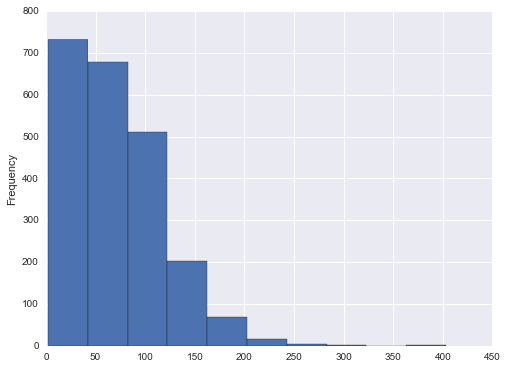

In [39]:
df_wizard['char_total'].plot.hist()

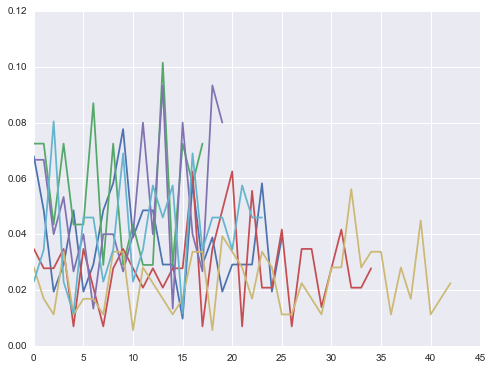

In [40]:
plt.plot(df_wizard['word_percent_arr'][0])
plt.plot(df_wizard['word_percent_arr'][1])
plt.plot(df_wizard['word_percent_arr'][2])
plt.plot(df_wizard['word_percent_arr'][3])
plt.plot(df_wizard['word_percent_arr'][4])
plt.plot(df_wizard['word_percent_arr'][5])

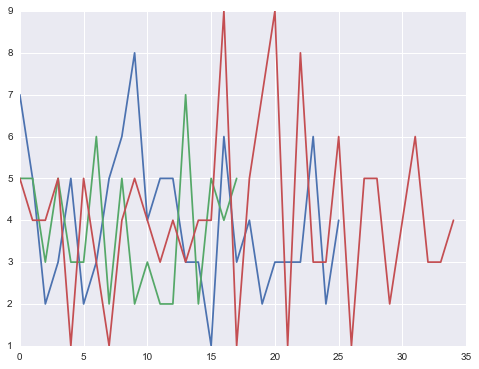

In [41]:
plt.plot(df_wizard['wrd_lengths'][0])
plt.plot(df_wizard['wrd_lengths'][1])
plt.plot(df_wizard['wrd_lengths'][2])

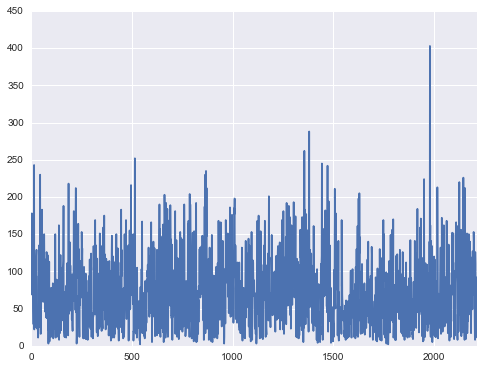

In [42]:
df_wizard['char_total'].plot()

### 2.3 Create the syl_count column
I borrowed this code that counts the syllables in words from https://github.com/DigTheDoug/SyllableCounter/blob/master/SyllableCounter.py and am working on making it more accurate. 

In [43]:
def CountSyllables(word, isName=True):
    vowels = "aeiouy"
    #single syllables in words like bread and lead, but split in names like Breanne and Adreann
    specials = ["ia","ea"] if isName else ["ia"]
    specials_except_end = ["ie","ya","es","ed"]  #seperate syllables unless ending the word
    currentWord = word.lower()
    numVowels = 0
    lastWasVowel = False
    last_letter = ""

    for letter in currentWord:
        if letter in vowels:
            #don't count diphthongs unless special cases
            combo = last_letter+letter
            if lastWasVowel and combo not in specials and combo not in specials_except_end:
                lastWasVowel = True
            else:
                numVowels += 1
                lastWasVowel = True
        else:
            lastWasVowel = False

        last_letter = letter

    #remove es & ed which are usually silent
    if len(currentWord) > 2 and currentWord[-2:] in specials_except_end:
        numVowels -= 1

    #remove silent single e, but not ee since it counted it before and we should be correct
    elif len(currentWord) > 2 and currentWord[-1:] == "e" and currentWord[-2:] != "ee" and currentWord != 'the':
        numVowels -= 1

    return numVowels

A loop that sends the first sentence through the CountSyllables function and prints the word with the syllable count.

In [44]:
for l in df_wizard['Sentences'][:1]:
    sent = TextBlob(l)
    for x in sent.words:
        print x
        m = CountSyllables(x) 
        print m
    
   

Dorothy
3
lived
1
in
1
the
1
midst
1
of
1
the
1
great
2
Kansas
2
prairies
2
with
1
Uncle
1
Henry
2
who
1
was
1
a
1
farmer
2
and
1
Aunt
1
Em
1
who
1
was
1
the
1
farmer
2
's
0
wife
1


In [45]:
print df_wizard['Sentences'][0]

Dorothy lived in the midst of the great Kansas prairies, with Uncle
Henry, who was a farmer, and Aunt Em, who was the farmer's wife.


As you can see the funciton is not completely accurate. However I compared it to other code I found on github and found this one to be more accurate and easier to understand so I am going to focus on improving this one.

In [46]:
CountSyllables('apple')

1

In [47]:
for l in df_wizard['Sentences'][200:201]:
    sent = TextBlob(l)
    for x in sent.words:
        print x
        m = CountSyllables(x) 
        print m
    

And
1
Toto
2
looked
1
up
1
into
2
her
1
face
1
with
1
his
1
little
1
black
1
eyes
0
and
1
wagged
1
his
1
tail
1
to
1
show
1
he
1
knew
1
what
1
she
0
meant
2


This creates an csv file with the word and its syllable count underneath so that I can work on improving the accuracy. 

In [48]:
sylWriter = csv.writer(open('syl_test2.csv', 'w'), delimiter=',')    
    
for l in df_wizard['Sentences']:
    sent = TextBlob(l)
    for x in sent.words:
        sylWriter.writerow([x])
        m = CountSyllables(x) 
        sylWriter.writerow([m])          
        
          

Creates the column containing the syllable count of each word for each sentence.

In [49]:
syl = []
for l in df_wizard['Sentences']:
    sent = TextBlob(l)
    syl_single = []
    for x in sent.words:
        m = CountSyllables(x)
        syl_single.append(m)
    syl.append(syl_single)    

In [50]:
df_wizard['syl_count'] = syl

In [51]:
df_wizard.head()

,Sentences,wrd_lengths,char_total,word_percent_arr,syl_count
0,Dorothy lived in the midst of the great Kansas...,"[7, 5, 2, 3, 5, 2, 3, 5, 6, 8, 4, 5, 5, 3, 3, ...",103,"[0.0679611650485, 0.0485436893204, 0.019417475...","[3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, ..."
1,"Their\nhouse was small, for the lumber to buil...","[5, 5, 3, 5, 3, 3, 6, 2, 5, 2, 3, 2, 2, 7, 2, ...",69,"[0.0724637681159, 0.0724637681159, 0.043478260...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, ..."
2,"There were four walls, a floor and a roof, whi...","[5, 4, 4, 5, 1, 5, 3, 1, 4, 5, 4, 3, 4, 3, 4, ...",144,"[0.0347222222222, 0.0277777777778, 0.027777777...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Uncle Henry\nand Aunt Em had a big bed in one ...,"[5, 5, 3, 4, 2, 3, 1, 3, 3, 2, 3, 6, 3, 7, 1, ...",75,"[0.0666666666667, 0.0666666666667, 0.04, 0.053...","[1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, ..."
4,"There was no garret at all, and no cellar--exc...","[5, 3, 2, 6, 2, 3, 3, 2, 6, 6, 1, 5, 4, 3, 2, ...",178,"[0.0280898876404, 0.0168539325843, 0.011235955...","[1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, ..."


In [52]:
df_wizard.tail()

,Sentences,wrd_lengths,char_total,word_percent_arr,syl_count
2211,"""Where in the world did you come from?""","[5, 2, 3, 5, 3, 3, 4, 4]",29,"[0.172413793103, 0.0689655172414, 0.1034482758...","[1, 1, 1, 1, 1, 1, 1, 1]"
2212,"""From the Land of Oz,"" said Dorothy gravely.","[4, 3, 4, 2, 2, 4, 7, 7]",33,"[0.121212121212, 0.0909090909091, 0.1212121212...","[1, 1, 1, 1, 1, 1, 3, 3]"
2213,"""And here is Toto, too.","[3, 4, 2, 4, 3]",16,"[0.1875, 0.25, 0.125, 0.25, 0.1875]","[1, 1, 1, 2, 1]"
2214,"And oh, Aunt Em!","[3, 2, 4, 2]",11,"[0.272727272727, 0.181818181818, 0.36363636363...","[1, 1, 1, 1]"
2215,"I'm so glad to be at home again!""","[1, 2, 2, 4, 2, 2, 2, 4, 5]",24,"[0.0416666666667, 0.0833333333333, 0.083333333...","[1, 0, 1, 1, 1, 1, 1, 1, 2]"


Creates a column with the syllable counts in arrays. 

In [53]:
syl_count_arr = []
for n in df_wizard['syl_count']:
    n = np.array(n)
    syl_count_arr.append(n)

In [54]:
syl_count_arr[:5]

[array([3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        2, 0, 1]),
 array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, 1, 0, 1, 3, 2]),
 array([1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
        3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1])]

In [55]:
df_wizard['syl_count_arr'] = syl_count_arr

In [56]:
df_wizard.head()

,Sentences,wrd_lengths,char_total,word_percent_arr,syl_count,syl_count_arr
0,Dorothy lived in the midst of the great Kansas...,"[7, 5, 2, 3, 5, 2, 3, 5, 6, 8, 4, 5, 5, 3, 3, ...",103,"[0.0679611650485, 0.0485436893204, 0.019417475...","[3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, ...","[3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, ..."
1,"Their\nhouse was small, for the lumber to buil...","[5, 5, 3, 5, 3, 3, 6, 2, 5, 2, 3, 2, 2, 7, 2, ...",69,"[0.0724637681159, 0.0724637681159, 0.043478260...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, ...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, ..."
2,"There were four walls, a floor and a roof, whi...","[5, 4, 4, 5, 1, 5, 3, 1, 4, 5, 4, 3, 4, 3, 4, ...",144,"[0.0347222222222, 0.0277777777778, 0.027777777...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Uncle Henry\nand Aunt Em had a big bed in one ...,"[5, 5, 3, 4, 2, 3, 1, 3, 3, 2, 3, 6, 3, 7, 1, ...",75,"[0.0666666666667, 0.0666666666667, 0.04, 0.053...","[1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, ...","[1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, ..."
4,"There was no garret at all, and no cellar--exc...","[5, 3, 2, 6, 2, 3, 3, 2, 6, 6, 1, 5, 4, 3, 2, ...",178,"[0.0280898876404, 0.0168539325843, 0.011235955...","[1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, ...","[1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, ..."


In [57]:
df_wizard.tail()

,Sentences,wrd_lengths,char_total,word_percent_arr,syl_count,syl_count_arr
2211,"""Where in the world did you come from?""","[5, 2, 3, 5, 3, 3, 4, 4]",29,"[0.172413793103, 0.0689655172414, 0.1034482758...","[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]"
2212,"""From the Land of Oz,"" said Dorothy gravely.","[4, 3, 4, 2, 2, 4, 7, 7]",33,"[0.121212121212, 0.0909090909091, 0.1212121212...","[1, 1, 1, 1, 1, 1, 3, 3]","[1, 1, 1, 1, 1, 1, 3, 3]"
2213,"""And here is Toto, too.","[3, 4, 2, 4, 3]",16,"[0.1875, 0.25, 0.125, 0.25, 0.1875]","[1, 1, 1, 2, 1]","[1, 1, 1, 2, 1]"
2214,"And oh, Aunt Em!","[3, 2, 4, 2]",11,"[0.272727272727, 0.181818181818, 0.36363636363...","[1, 1, 1, 1]","[1, 1, 1, 1]"
2215,"I'm so glad to be at home again!""","[1, 2, 2, 4, 2, 2, 2, 4, 5]",24,"[0.0416666666667, 0.0833333333333, 0.083333333...","[1, 0, 1, 1, 1, 1, 1, 1, 2]","[1, 0, 1, 1, 1, 1, 1, 1, 2]"


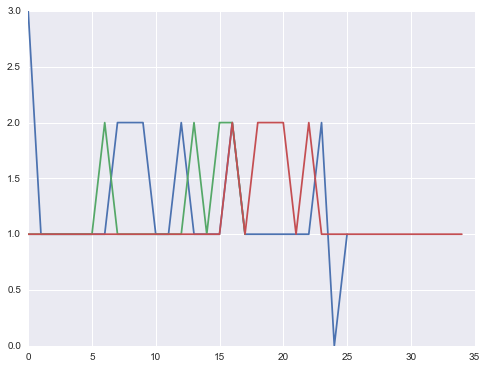

In [58]:
plt.plot(df_wizard['syl_count_arr'][0])
plt.plot(df_wizard['syl_count_arr'][1])
plt.plot(df_wizard['syl_count_arr'][2])

In [59]:
for x in df_wizard['syl_count_arr'][:3]:
    print x

[3 1 1 1 1 1 1 2 2 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 0 1]
[1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 2 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


In [60]:
for x in df_wizard['wrd_lengths'][:3]:
    print x

[7, 5, 2, 3, 5, 2, 3, 5, 6, 8, 4, 5, 5, 3, 3, 1, 6, 3, 4, 2, 3, 3, 3, 6, 2, 4]
[5, 5, 3, 5, 3, 3, 6, 2, 5, 2, 3, 2, 2, 7, 2, 5, 4, 5]
[5, 4, 4, 5, 1, 5, 3, 1, 4, 5, 4, 3, 4, 3, 4, 4, 9, 1, 5, 7, 9, 1, 8, 3, 3, 6, 1, 5, 5, 2, 4, 6, 3, 3, 4]


In [61]:
for x in df_wizard['word_percent_arr'][:3]:
    print x

[ 0.06796117  0.04854369  0.01941748  0.02912621  0.04854369  0.01941748
  0.02912621  0.04854369  0.05825243  0.0776699   0.03883495  0.04854369
  0.04854369  0.02912621  0.02912621  0.00970874  0.05825243  0.02912621
  0.03883495  0.01941748  0.02912621  0.02912621  0.02912621  0.05825243
  0.01941748  0.03883495]
[ 0.07246377  0.07246377  0.04347826  0.07246377  0.04347826  0.04347826
  0.08695652  0.02898551  0.07246377  0.02898551  0.04347826  0.02898551
  0.02898551  0.10144928  0.02898551  0.07246377  0.05797101  0.07246377]
[ 0.03472222  0.02777778  0.02777778  0.03472222  0.00694444  0.03472222
  0.02083333  0.00694444  0.02777778  0.03472222  0.02777778  0.02083333
  0.02777778  0.02083333  0.02777778  0.02777778  0.0625      0.00694444
  0.03472222  0.04861111  0.0625      0.00694444  0.05555556  0.02083333
  0.02083333  0.04166667  0.00694444  0.03472222  0.03472222  0.01388889
  0.02777778  0.04166667  0.02083333  0.02083333  0.02777778]


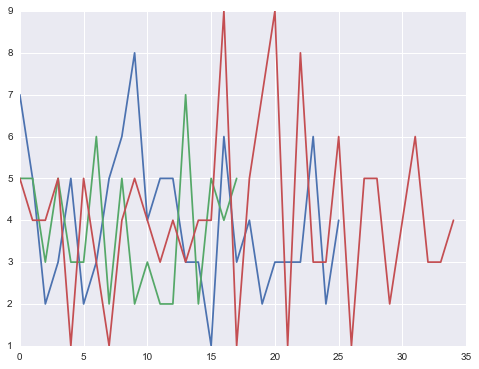

In [62]:
plt.plot(df_wizard['wrd_lengths'][0])
plt.plot(df_wizard['wrd_lengths'][1])
plt.plot(df_wizard['wrd_lengths'][2])

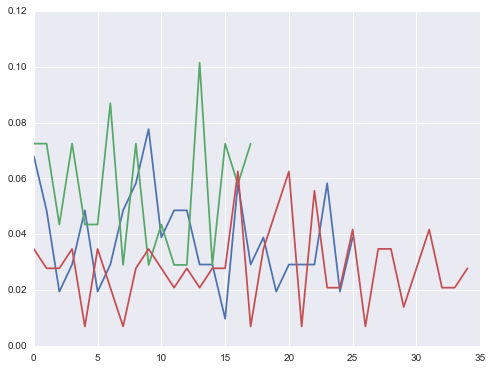

In [63]:
plt.plot(df_wizard['word_percent_arr'][0])
plt.plot(df_wizard['word_percent_arr'][1])
plt.plot(df_wizard['word_percent_arr'][2])

I think I might like what the visual of the syllable counts shows over the characters per word and character percent. 

### 2.4 Create sentiment column

In [64]:
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [65]:
detect_sentiment(df_wizard['Sentences'][0])

0.8

In [66]:
df_wizard['Sentences'][0]

"Dorothy lived in the midst of the great Kansas prairies, with Uncle\nHenry, who was a farmer, and Aunt Em, who was the farmer's wife."

In [67]:
df_wizard['sentiment'] = df_wizard['Sentences'].apply(detect_sentiment)

In [68]:
df_wizard.head()

,Sentences,wrd_lengths,char_total,word_percent_arr,syl_count,syl_count_arr,sentiment
0,Dorothy lived in the midst of the great Kansas...,"[7, 5, 2, 3, 5, 2, 3, 5, 6, 8, 4, 5, 5, 3, 3, ...",103,"[0.0679611650485, 0.0485436893204, 0.019417475...","[3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, ...","[3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, ...",0.80000
1,"Their\nhouse was small, for the lumber to buil...","[5, 5, 3, 5, 3, 3, 6, 2, 5, 2, 3, 2, 2, 7, 2, ...",69,"[0.0724637681159, 0.0724637681159, 0.043478260...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, ...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, ...",0.12500
2,"There were four walls, a floor and a roof, whi...","[5, 4, 4, 5, 1, 5, 3, 1, 4, 5, 4, 3, 4, 3, 4, ...",144,"[0.0347222222222, 0.0277777777778, 0.027777777...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.00000
3,Uncle Henry\nand Aunt Em had a big bed in one ...,"[5, 5, 3, 4, 2, 3, 1, 3, 3, 2, 3, 6, 3, 7, 1, ...",75,"[0.0666666666667, 0.0666666666667, 0.04, 0.053...","[1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, ...","[1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, ...",-0.09375
4,"There was no garret at all, and no cellar--exc...","[5, 3, 2, 6, 2, 3, 3, 2, 6, 6, 1, 5, 4, 3, 2, ...",178,"[0.0280898876404, 0.0168539325843, 0.011235955...","[1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, ...","[1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, ...",0.23750


In [69]:
df_wizard.tail()

,Sentences,wrd_lengths,char_total,word_percent_arr,syl_count,syl_count_arr,sentiment
2211,"""Where in the world did you come from?""","[5, 2, 3, 5, 3, 3, 4, 4]",29,"[0.172413793103, 0.0689655172414, 0.1034482758...","[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",0.000
2212,"""From the Land of Oz,"" said Dorothy gravely.","[4, 3, 4, 2, 2, 4, 7, 7]",33,"[0.121212121212, 0.0909090909091, 0.1212121212...","[1, 1, 1, 1, 1, 1, 3, 3]","[1, 1, 1, 1, 1, 1, 3, 3]",0.000
2213,"""And here is Toto, too.","[3, 4, 2, 4, 3]",16,"[0.1875, 0.25, 0.125, 0.25, 0.1875]","[1, 1, 1, 2, 1]","[1, 1, 1, 2, 1]",0.000
2214,"And oh, Aunt Em!","[3, 2, 4, 2]",11,"[0.272727272727, 0.181818181818, 0.36363636363...","[1, 1, 1, 1]","[1, 1, 1, 1]",0.000
2215,"I'm so glad to be at home again!""","[1, 2, 2, 4, 2, 2, 2, 4, 5]",24,"[0.0416666666667, 0.0833333333333, 0.083333333...","[1, 0, 1, 1, 1, 1, 1, 1, 2]","[1, 0, 1, 1, 1, 1, 1, 1, 2]",0.625


## 3. Exploring Sentiment

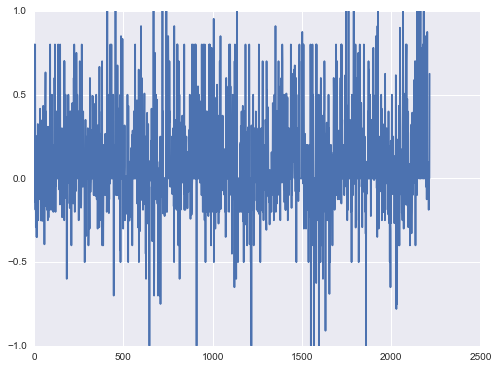

In [70]:
plt.plot(df_wizard['sentiment'])

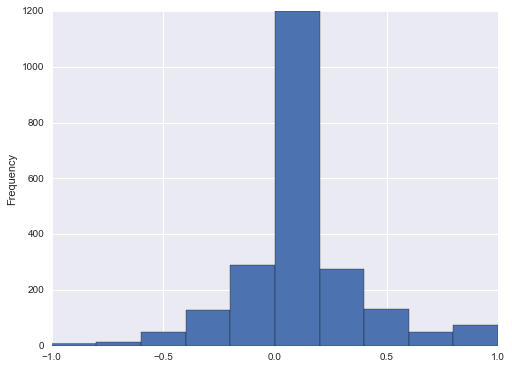

In [71]:
df_wizard['sentiment'].plot.hist()

In [72]:
df_wizard.describe()

,char_total,sentiment
count,2216.000000,2216.000000
mean,70.790614,0.082382
std,46.465613,0.272632
min,2.000000,-1.000000
25%,34.000000,0.000000
50%,65.000000,0.000000
75%,100.000000,0.200000
max,403.000000,1.000000


Creates a series of the story broken up into 10% pieces and compares the sentiment mean scores.

In [73]:
first_10 = df_wizard['sentiment'][:222].mean()

In [74]:
sec_10 = df_wizard['sentiment'][222:443].mean()

In [75]:
third_10 = df_wizard['sentiment'][443:665].mean()

In [76]:
fourth_10 = df_wizard['sentiment'][665:887].mean()

In [77]:
fifth_10 = df_wizard['sentiment'][887:1109].mean()

In [78]:
sixth_10 = df_wizard['sentiment'][1109:1331].mean()

In [79]:
seventh_10 = df_wizard['sentiment'][1331:1553].mean()

In [80]:
eigth_10 = df_wizard['sentiment'][1553:1775].mean()

In [81]:
ninth_10 = df_wizard['sentiment'][1775:1997].mean()

In [82]:
tenth_10 = df_wizard['sentiment'][1997:2215].mean()

In [83]:
df2 = pd.Series([first_10, sec_10, third_10, fourth_10, fifth_10, sixth_10, seventh_10, eigth_10, ninth_10, tenth_10])

In [84]:
p = len(df_wizard) * .10 
p = int(p)
print p

221


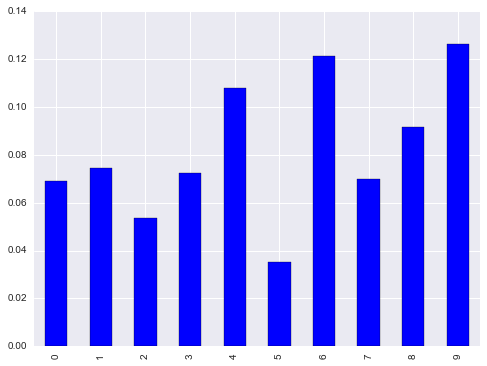

In [85]:
df2.plot.bar()

This bar graph is really interesting when you compare it to Michael Hauge's "Six Stage Plot Structure that is similar to the Hero's Journey as explained in "The Writer's Journey", which was based off of Joseph Campbel's, the mythologist, writings on the hero's journey.  Michael breaks down the story structure into six stages. At the middle point, which is around the 50% mark the story reaches the turning point number 3 that is called the point of no return. On this graph this shows the lowest dip in sentiment for the whole story.  (http://bfifab.org.uk/wp-content/uploads/2015/02/Michael-Hauges-Six-Stage-Plot-Structuree-.jpg, Michael Hauge's "Six Stage Plot Structure"  

### The novel broken up into The Six Stage Plot Structure and its sentiment mean scores compared. 

In [86]:
# following the percentages of Michael Hauge's "Six Stage Plot Structure"
Stage_1 = df_wizard['sentiment'][:222].mean()
Stage_2 = df_wizard['sentiment'][222:332].mean()
Stage_3 = df_wizard['sentiment'][332:886].mean()
Stage_4 = df_wizard['sentiment'][886:1440].mean()
Stage_5 = df_wizard['sentiment'][1440:1883].mean()
Stage_6 = df_wizard['sentiment'][1883:].mean()


In [87]:
SixPlot = pd.Series([Stage_1, Stage_2, Stage_3, Stage_4, Stage_5, Stage_6])

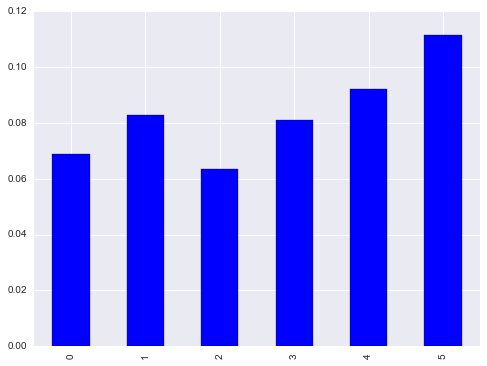

In [88]:
SixPlot.plot.bar()

Breaking the novel up into the six stages(10%, 15%, 25%, 25%, 20, 5%) shows an overall pattern but I don't think it tells as much as when the novel is in smaller pieces. Below I create a function to be able to easily break the novel up into different sizes. First I turn the series into an array.  

A function to put the above panda series into a list, transforming it to an array and then displaying it in a bar graph. 

In [89]:
ten_segments = []
lng = len(df_wizard) 
n = 0
t = p + 5
for x in range(0 , 10):
    s = df_wizard['sentiment'][n:t].mean()
    print "df_wizard['sentiment'][%s:%s].mean() = %s"  % (n, t, s)
    n = n + p
    t = t + p
    ten_segments.append(s)        

df_wizard['sentiment'][0:226].mean() = 0.0756455915029
df_wizard['sentiment'][221:447].mean() = 0.0728704604249
df_wizard['sentiment'][442:668].mean() = 0.0530911715395
df_wizard['sentiment'][663:889].mean() = 0.0710494835896
df_wizard['sentiment'][884:1110].mean() = 0.110109468846
df_wizard['sentiment'][1105:1331].mean() = 0.0340352282305
df_wizard['sentiment'][1326:1552].mean() = 0.120700897247
df_wizard['sentiment'][1547:1773].mean() = 0.068647264629
df_wizard['sentiment'][1768:1994].mean() = 0.0984240543339
df_wizard['sentiment'][1989:2215].mean() = 0.113742627364


In [90]:
ten_segments

[0.07564559150289238,
 0.07287046042494051,
 0.05309117153945693,
 0.07104948358958313,
 0.11010946884564146,
 0.0340352282304716,
 0.1207008972468043,
 0.06864726462901241,
 0.0984240543338994,
 0.11374262736403223]

In [91]:
len(df_wizard)


2216

In [92]:
n = np.array(n)
ten_segments = np.array(ten_segments)
print ten_segments

[ 0.07564559  0.07287046  0.05309117  0.07104948  0.11010947  0.03403523
  0.1207009   0.06864726  0.09842405  0.11374263]


In [310]:
ten_segments.mean()

0.081831624770673447

<Container object of 10 artists>

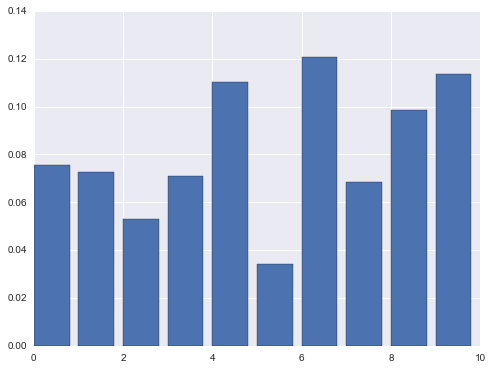

In [93]:
n = len(ten_segments)
x = range(n)

plt.bar(x , ten_segments)

It's interesting to look at the dips and rises in this when compared to the Six Stage Plot Structure mentioned above. I think it might tell more if it is broken up into 5% pieces. 

### Twenty  5% Segments

In [94]:
p_20 = len(df_wizard) * .05 
p_20 = int(p_20) 
twenty_segments = []
n_20 = 0
t_20 = p_20
for x in range(0 , 20):
    s_20 = df_wizard['sentiment'][n_20:t_20].mean()
    print "df_wizard['sentiment'][%s:%s].mean() = %s"  % (n_20, t_20, s_20)
    n_20 = n_20 + p_20
    t_20 = t_20 + p_20
    twenty_segments.append(s_20)        

df_wizard['sentiment'][0:110].mean() = 0.0456872048406
df_wizard['sentiment'][110:220].mean() = 0.0899715786108
df_wizard['sentiment'][220:330].mean() = 0.086596412447
df_wizard['sentiment'][330:440].mean() = 0.0591798668503
df_wizard['sentiment'][440:550].mean() = 0.0632975712209
df_wizard['sentiment'][550:660].mean() = 0.054530653942
df_wizard['sentiment'][660:770].mean() = 0.0661281483668
df_wizard['sentiment'][770:880].mean() = 0.0717023057961
df_wizard['sentiment'][880:990].mean() = 0.13285799554
df_wizard['sentiment'][990:1100].mean() = 0.0832280242905
df_wizard['sentiment'][1100:1210].mean() = 0.0501925641698
df_wizard['sentiment'][1210:1320].mean() = 0.0299300663562
df_wizard['sentiment'][1320:1430].mean() = 0.104884259259
df_wizard['sentiment'][1430:1540].mean() = 0.142953763829
df_wizard['sentiment'][1540:1650].mean() = 0.0129493555687
df_wizard['sentiment'][1650:1760].mean() = 0.108704198369
df_wizard['sentiment'][1760:1870].mean() = 0.0913537157287
df_wizard['sentiment'][18

In [95]:
twenty_segments = np.array(twenty_segments)
print twenty_segments

[ 0.0456872   0.08997158  0.08659641  0.05917987  0.06329757  0.05453065
  0.06612815  0.07170231  0.132858    0.08322802  0.05019256  0.02993007
  0.10488426  0.14295376  0.01294936  0.1087042   0.09135372  0.12861547
  0.04526714  0.17876303]


<Container object of 20 artists>

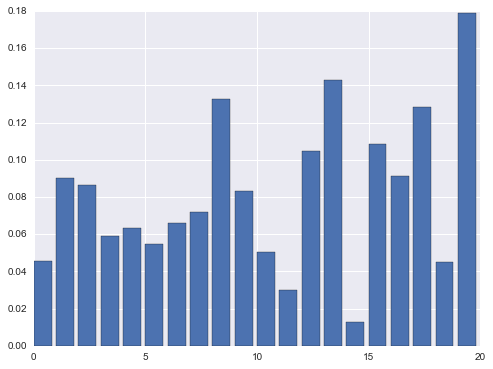

In [96]:
n = len(twenty_segments)
x = range(n)

plt.bar(x , twenty_segments)

### Sentences from the 50% Mark, Turning Point  3 and Point of No Return

Dorothy and her friends meet the great and terrible wizard of oz and are told that they have to kill the wicked witch to get what they desire. Dorothy - "There is no hope for me," she said sadly, "for Oz will not send me home until I have killed the Wicked Witch of the West; and that I can never do."

In [97]:
for x in df_wizard['Sentences'][1007:1108]:
    print x

Of course this politeness was wasted on the
Scarecrow; for when he found himself alone in his room he stood
stupidly in one spot, just within the doorway, to wait till morning.
It would not rest him to lie down, and he could not close his eyes; so
he remained all night staring at a little spider which was weaving its
web in a corner of the room, just as if it were not one of the most
wonderful rooms in the world.
The Tin Woodman lay down on his bed from
force of habit, for he remembered when he was made of flesh; but not
being able to sleep, he passed the night moving his joints up and down
to make sure they kept in good working order.
The Lion would have
preferred a bed of dried leaves in the forest, and did not like being
shut up in a room; but he had too much sense to let this worry him, so
he sprang upon the bed and rolled himself up like a cat and purred
himself asleep in a minute.
The next morning, after breakfast, the green maiden came to fetch
Dorothy, and she dressed her in on

### Sentences from the 75% Mark, Turning Point 4, and Major Setback

"We have lost our way," said Dorothy. 

In this section Dorothy learns that the cap on her head has a charm that gives three wishes to the wearer, which the flying monkeys must fullfil. While the monkeys are carrying Dorothy and her friends back to the Emerald City she learns about how the golden cap came to be and it's a sad but beautiful story. 

At the end of these sentences we read "They thought the Great Wizard would send for them at once, but he did not. They had no word from him the next day, nor the next, nor the next. The waiting was tiresome and wearing, and at last they grew vexed that Oz should treat them in so poor a fashion, after sending them to undergo hardships and slavery."

In [98]:
for x in df_wizard['Sentences'][1411:1512]:
    print x

"We have lost our way," said Dorothy.
"Can you tell us where the
Emerald City is?"
"Certainly," answered the Queen; "but it is a great way off, for you
have had it at your backs all this time."
Then she noticed Dorothy's
Golden Cap, and said, "Why don't you use the charm of the Cap, and call
the Winged Monkeys to you?
They will carry you to the City of Oz in
less than an hour."
"I didn't know there was a charm," answered Dorothy, in surprise.
"What is it?"
"It is written inside the Golden Cap," replied the Queen of the Mice.
"But if you are going to call the Winged Monkeys we must run away, for
they are full of mischief and think it great fun to plague us."
"Won't they hurt me?"
asked the girl anxiously.
"Oh, no.
They must obey the wearer of the Cap.
Good-bye!"
And she
scampered out of sight, with all the mice hurrying after her.
Dorothy looked inside the Golden Cap and saw some words written upon
the lining.
These, she thought, must be the charm, so she read the
directions carefully a

### The last sentences of the story where we see the largest spike in sentiment when viewing the twenty segments on the bar gragh

This section starts off with "Dorothy was once more filled with the hope of getting home, and the Scarecrow and the Tin Woodman were glad to be of use to her." 

In [99]:
for x in df_wizard['Sentences'][1916:]:
    print x

Dorothy was once more filled with the hope of
getting home, and the Scarecrow and the Tin Woodman were glad to be of
use to her.
As for the Lion, he sniffed the fresh air with delight and
whisked his tail from side to side in pure joy at being in the country
again, while Toto ran around them and chased the moths and butterflies,
barking merrily all the time.
"City life does not agree with me at all," remarked the Lion, as they
walked along at a brisk pace.
"I have lost much flesh since I lived
there, and now I am anxious for a chance to show the other beasts how
courageous I have grown."
They now turned and took a last look at the Emerald City.
All they
could see was a mass of towers and steeples behind the green walls, and
high up above everything the spires and dome of the Palace of Oz.
"Oz was not such a bad Wizard, after all," said the Tin Woodman, as he
felt his heart rattling around in his breast.
"He knew how to give me brains, and very good brains, too," said the
Scarecrow.
"If

## 4. Exploring Character Total and Rhythm

I want to go further in this and discover the different speed and rhythm of language as the story progresses through structure and sentiment polarity. Below is the mean character totals of sentences grouped into the the Six Stage Plot Structure. 

In [100]:
Stage_1_char = df_wizard['char_total'][:222].mean()
Stage_2_char = df_wizard['char_total'][222:332].mean()
Stage_3_char = df_wizard['char_total'][332:886].mean()
Stage_4_char = df_wizard['char_total'][886:1440].mean()
Stage_5_char = df_wizard['char_total'][1440:1883].mean()
Stage_6_char = df_wizard['char_total'][1883:].mean()


In [101]:
SixPlot_char = pd.Series([Stage_1_char, Stage_2_char, Stage_3_char, Stage_4_char, Stage_5_char, Stage_6_char])

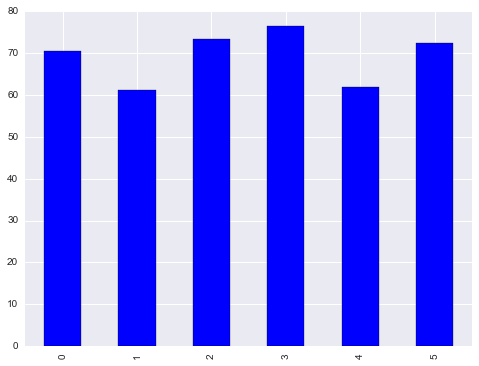

In [102]:
SixPlot_char.plot.bar()

It seems there is a positive correlation to sentiment and character total. I want to explore this further. 

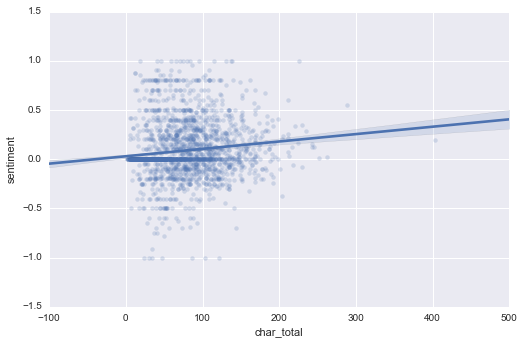

In [103]:
sns.lmplot(x='char_total', y='sentiment', data=df_wizard, aspect=1.5, scatter_kws={'alpha':0.2})

## 5. Break Novel Up Using Character Count Instead of Sentence Count

### Length of Novel

In [104]:
df_wizard['char_total'].sum()

156872

In [105]:
df_wizard['char_total'][:101].sum()

7854

### Exploring how to break novel up into 5% pieces via character count

In [108]:
p_20_char = len(df_wizard) * .05 
p_20_char = int(p_20_char) 
char_total_sums = []
n_20_char = 0
t_20_char = p_20
for x in range(0 , 20):
    s_20_char = df_wizard['char_total'][n_20_char:t_20_char].sum()
    print "df_wizard['char_total'][%s:%s].sum() = %s"  % (n_20_char, t_20_char, s_20_char)
    n_20_char = n_20_char + p_20_char
    t_20_char = t_20_char + p_20_char
    char_total_sums.append(s_20_char)
           

df_wizard['char_total'][0:110].sum() = 8186
df_wizard['char_total'][110:220].sum() = 7235
df_wizard['char_total'][220:330].sum() = 6894
df_wizard['char_total'][330:440].sum() = 7058
df_wizard['char_total'][440:550].sum() = 7731
df_wizard['char_total'][550:660].sum() = 7903
df_wizard['char_total'][660:770].sum() = 8674
df_wizard['char_total'][770:880].sum() = 8956
df_wizard['char_total'][880:990].sum() = 7576
df_wizard['char_total'][990:1100].sum() = 8235
df_wizard['char_total'][1100:1210].sum() = 7824
df_wizard['char_total'][1210:1320].sum() = 10047
df_wizard['char_total'][1320:1430].sum() = 8707
df_wizard['char_total'][1430:1540].sum() = 8314
df_wizard['char_total'][1540:1650].sum() = 6127
df_wizard['char_total'][1650:1760].sum() = 6043
df_wizard['char_total'][1760:1870].sum() = 6540
df_wizard['char_total'][1870:1980].sum() = 7601
df_wizard['char_total'][1980:2090].sum() = 7437
df_wizard['char_total'][2090:2200].sum() = 8953


In [109]:
char_total_sums

[8186,
 7235,
 6894,
 7058,
 7731,
 7903,
 8674,
 8956,
 7576,
 8235,
 7824,
 10047,
 8707,
 8314,
 6127,
 6043,
 6540,
 7601,
 7437,
 8953]

<Container object of 20 artists>
<Container object of 20 artists>


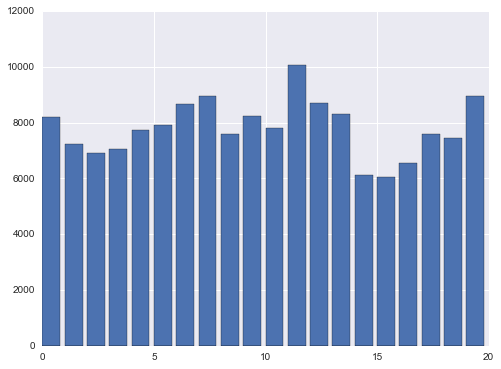

In [111]:
n = len(char_total_sums)
x = range(n)

plt.bar(x , char_total_sums)

<Container object of 20 artists>

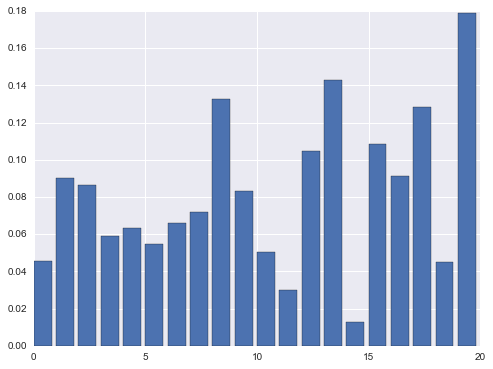

In [112]:
plt.bar(x , twenty_segments)


In [116]:
df_wizard['char_total'][0:101].sum() 

7854

In [124]:
df_wizard['char_total'][101:222].sum() 

7785

In [131]:
df_wizard['char_total'][222:350].sum() 

7845

In [139]:
df_wizard['char_total'][350:470].sum() 

7899

In [145]:
df_wizard['char_total'][470:585].sum() 

7874

In [149]:
df_wizard['char_total'][585:684].sum() 

7861

In [153]:
df_wizard['char_total'][684:787].sum() 

7788

In [158]:
df_wizard['char_total'][787:880].sum()

7731

In [164]:
df_wizard['char_total'][880:993].sum()

7782

In [172]:
sent_stop = []
x = 7441
while x <= 7844:
    x += 1
    sent_stop.append(x)   

In [173]:
sent_stop

[7442,
 7443,
 7444,
 7445,
 7446,
 7447,
 7448,
 7449,
 7450,
 7451,
 7452,
 7453,
 7454,
 7455,
 7456,
 7457,
 7458,
 7459,
 7460,
 7461,
 7462,
 7463,
 7464,
 7465,
 7466,
 7467,
 7468,
 7469,
 7470,
 7471,
 7472,
 7473,
 7474,
 7475,
 7476,
 7477,
 7478,
 7479,
 7480,
 7481,
 7482,
 7483,
 7484,
 7485,
 7486,
 7487,
 7488,
 7489,
 7490,
 7491,
 7492,
 7493,
 7494,
 7495,
 7496,
 7497,
 7498,
 7499,
 7500,
 7501,
 7502,
 7503,
 7504,
 7505,
 7506,
 7507,
 7508,
 7509,
 7510,
 7511,
 7512,
 7513,
 7514,
 7515,
 7516,
 7517,
 7518,
 7519,
 7520,
 7521,
 7522,
 7523,
 7524,
 7525,
 7526,
 7527,
 7528,
 7529,
 7530,
 7531,
 7532,
 7533,
 7534,
 7535,
 7536,
 7537,
 7538,
 7539,
 7540,
 7541,
 7542,
 7543,
 7544,
 7545,
 7546,
 7547,
 7548,
 7549,
 7550,
 7551,
 7552,
 7553,
 7554,
 7555,
 7556,
 7557,
 7558,
 7559,
 7560,
 7561,
 7562,
 7563,
 7564,
 7565,
 7566,
 7567,
 7568,
 7569,
 7570,
 7571,
 7572,
 7573,
 7574,
 7575,
 7576,
 7577,
 7578,
 7579,
 7580,
 7581,
 7582,
 7583,
 7584,

In [174]:
max(sent_stop)

7845

In [231]:
sent_stop = []
w = 0
x = 881
while w <= 7844:
    w = df_wizard['char_total'][880:x].sum()
    sent_stop.append(x)
    x += 1
          

sent_stop

In [232]:
max(sent_stop)

994

In [183]:
df_wizard['char_total'][880:992].sum()

7672

In [226]:
sent_stop = []
w = 0
x = 994
while w <= 7800:
    w = df_wizard['char_total'][994:x].sum()
    sent_stop.append(x)
    x += 1

In [227]:
max(sent_stop)

1099

In [228]:
df_wizard['char_total'][994:1099].sum()

7834

In [217]:
sent_stop = []
w = 0
x = 881
while w <= 7700:
    w = df_wizard['char_total'][880:x].sum()
    sent_stop.append(x)
    x += 1

In [218]:
max(sent_stop)

993

In [243]:
sent_stop = []
t = 0
w = 0
x = 0
while w <= 7844:
    w = df_wizard['char_total'][t:x].sum()
    sent_stop.append(x)
    x += 1

In [320]:
tot = df_wizard['char_total'].sum()

156872

In [ ]:
char_range = range(0, tot, (tot * .05))

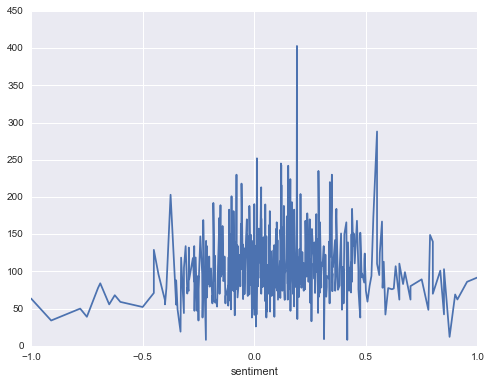

In [334]:
df_wizard.groupby('sentiment').char_total.mean().plot()


In [244]:
max(sent_stop)

101

## 5.1 Final Function and Loop 

Function that finds the number of sentences that come closest to 7700 characters, which is about 5% of the number of characters in the novel. 


In [287]:
t = 0
x = 0

def find_this(t, x):
    w = 0
    
    sent_stop = []
    while w <= 7700:
        w = df_wizard['char_total'][t:x].sum()
        sent_stop.append(x)
        x += 1
    return max(sent_stop) 
    
    

In [271]:
find_this(0, 0)

101

Loop that uses the find_this function to find the start and stop points for the whole novel. 

In [293]:
t = 0
x = 0
start_point = []
stop_point = []
for n in range(1, 21):
    s = find_this(t, x)
    print "df_wizard['char_total'][%s:%s]" %(t, s)
    start_point.append(t)
    stop_point.append(s)
    t = s
    x = s + 1
       

df_wizard['char_total'][0:98]
df_wizard['char_total'][98:220]
df_wizard['char_total'][220:345]
df_wizard['char_total'][345:465]
df_wizard['char_total'][465:578]
df_wizard['char_total'][578:675]
df_wizard['char_total'][675:777]
df_wizard['char_total'][777:871]
df_wizard['char_total'][871:983]
df_wizard['char_total'][983:1082]
df_wizard['char_total'][1082:1195]
df_wizard['char_total'][1195:1285]
df_wizard['char_total'][1285:1368]
df_wizard['char_total'][1368:1471]
df_wizard['char_total'][1471:1601]
df_wizard['char_total'][1601:1736]
df_wizard['char_total'][1736:1860]
df_wizard['char_total'][1860:1980]
df_wizard['char_total'][1980:2093]
df_wizard['char_total'][2093:2192]


In [294]:
start_point

[0,
 98,
 220,
 345,
 465,
 578,
 675,
 777,
 871,
 983,
 1082,
 1195,
 1285,
 1368,
 1471,
 1601,
 1736,
 1860,
 1980,
 2093]

In [295]:
stop_point

[98,
 220,
 345,
 465,
 578,
 675,
 777,
 871,
 983,
 1082,
 1195,
 1285,
 1368,
 1471,
 1601,
 1736,
 1860,
 1980,
 2093,
 2192]

Gets the mean sentiment for each piece of novel. 

In [303]:
twenty_piece_char = []
st = 0
for l in start_point: 
    strt = start_point[st]
    stp = stop_point[st]
    print strt
    print stp
    mn = df_wizard['sentiment'][strt:stp].mean()
    twenty_piece_char.append(mn)
    print mn
    st +=1
   

0
98
0.0432690332627
98
220
0.0875582042616
220
345
0.0865000810486
345
465
0.0600602002165
465
578
0.0685761388112
578
675
0.0267178857797
675
777
0.0805753319846
777
871
0.066085342086
871
983
0.136214698
983
1082
0.064571542141
1082
1195
0.0711805688576
1195
1285
0.0305350061461
1285
1368
0.064578751514
1368
1471
0.162753698567
1471
1601
0.0447503306878
1601
1736
0.0800617729321
1736
1860
0.110053363415
1860
1980
0.116282933502
1980
2093
0.0456345175842
2093
2192
0.195716872914


In [304]:
twenty_piece_char

[0.043269033262655715,
 0.08755820426158535,
 0.08650008104858103,
 0.06006020021645021,
 0.06857613881120518,
 0.026717885779741445,
 0.0805753319846457,
 0.06608534208600694,
 0.13621469800041233,
 0.06457154214098657,
 0.07118056885756004,
 0.030535006146117257,
 0.06457875151399249,
 0.16275369856680538,
 0.0447503306878307,
 0.0800617729321433,
 0.11005336341525856,
 0.11628293350168346,
 0.04563451758418573,
 0.19571687291384263]

In [305]:
n = np.array(n)
twenty_piece_char = np.array(twenty_piece_char)
print twenty_piece_char

[ 0.04326903  0.0875582   0.08650008  0.0600602   0.06857614  0.02671789
  0.08057533  0.06608534  0.1362147   0.06457154  0.07118057  0.03053501
  0.06457875  0.1627537   0.04475033  0.08006177  0.11005336  0.11628293
  0.04563452  0.19571687]


### Sentiment of the twenty pieces broken up by sentences

<Container object of 20 artists>

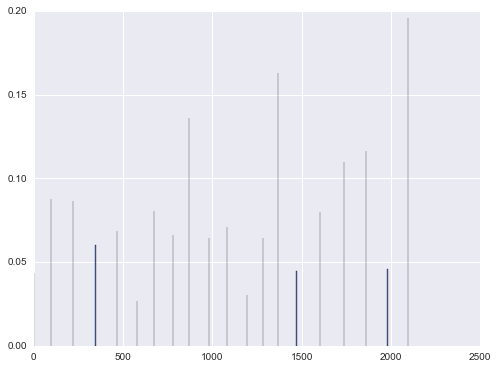

In [309]:
plt.bar(x, twenty_piece_char)

### Sentiment when breaking the novel up by character total.

I think this approach gives a more accurate representation of the sentiment at different
points in the novel. 

<Container object of 20 artists>

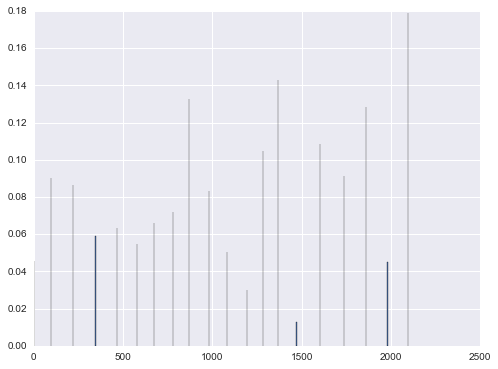

In [319]:
plt.bar(x , twenty_segments)

## 6 Exploring Different Novels Using Sklearn

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
alice = strip_headers(load_etext(11))

In [4]:
wizard = strip_headers(load_etext(55))

In [5]:
huck = strip_headers(load_etext(76))

In [6]:
jungle = strip_headers(load_etext(236))

In [7]:
holmes = strip_headers(load_etext(1661))

In [8]:
frankenstein = strip_headers(load_etext(84))

In [9]:
dracula = strip_headers(load_etext(345))

In [10]:
novels =[alice, wizard, huck, jungle, holmes, frankenstein, dracula]

In [11]:
vectorizer = CountVectorizer(input='novels')
dtm = vectorizer.fit_transform(novels)
vocab = vectorizer.get_feature_names()

In [12]:
print vocab[-50:]

[u'yet', u'yew', u'yews', u'yield', u'yielded', u'yielding', u'yields', u'yirls', u'yisterday', u'yistiddy', u'yit', u'yo', u'yoke', u'yoked', u'yon', u'yonder', u'york', u'yorkshire', u'you', u'you_', u'young', u'younger', u'youngest', u'youngster', u'youngsters', u'your', u'yourn', u'yours', u'yourself', u'yourselves', u'youth', u'youthful', u'yow', u'yus', u'yuther', u'zaharrof', u'zeal', u'zealand', u'zealous', u'zero', u'zest', u'zigzag', u'zik', u'ziz', u'zoo', u'zooelogical', u'zooephagous', u'zooephagy', u'zuz', u'zy']


In [13]:
dtm.shape

(7, 19366)

In [14]:
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input='novels',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
vectorizer = CountVectorizer(input='novels',  stop_words='english', ngram_range=(1, 2))
dtm = vectorizer.fit_transform(novels)
dtm.shape

(7, 205887)

In [16]:
print vocab[-50:]

[u'yet', u'yew', u'yews', u'yield', u'yielded', u'yielding', u'yields', u'yirls', u'yisterday', u'yistiddy', u'yit', u'yo', u'yoke', u'yoked', u'yon', u'yonder', u'york', u'yorkshire', u'you', u'you_', u'young', u'younger', u'youngest', u'youngster', u'youngsters', u'your', u'yourn', u'yours', u'yourself', u'yourselves', u'youth', u'youthful', u'yow', u'yus', u'yuther', u'zaharrof', u'zeal', u'zealand', u'zealous', u'zero', u'zest', u'zigzag', u'zik', u'ziz', u'zoo', u'zooelogical', u'zooephagous', u'zooephagy', u'zuz', u'zy']


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
dist = 1 - cosine_similarity(dtm)

In [19]:
np.round(dist, 2)

array([[ 0.  ,  0.57,  0.56,  0.5 ,  0.5 ,  0.7 ,  0.52],
       [ 0.57,  0.  ,  0.63,  0.54,  0.53,  0.64,  0.53],
       [ 0.56,  0.63, -0.  ,  0.53,  0.5 ,  0.67,  0.45],
       [ 0.5 ,  0.54,  0.53,  0.  ,  0.46,  0.6 ,  0.46],
       [ 0.5 ,  0.53,  0.5 ,  0.46, -0.  ,  0.47,  0.31],
       [ 0.7 ,  0.64,  0.67,  0.6 ,  0.47,  0.  ,  0.42],
       [ 0.52,  0.53,  0.45,  0.46,  0.31,  0.42,  0.  ]])

In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [21]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

In [22]:
pos = mds.fit_transform(dist)

In [ ]:
xs, ys = pos[:, 0], pos[:, 1]

In [ ]:
plt.scatter(xs, ys)

In [ ]:
plt.show()

### Plot showing how similar or disimilar the novels are based on content

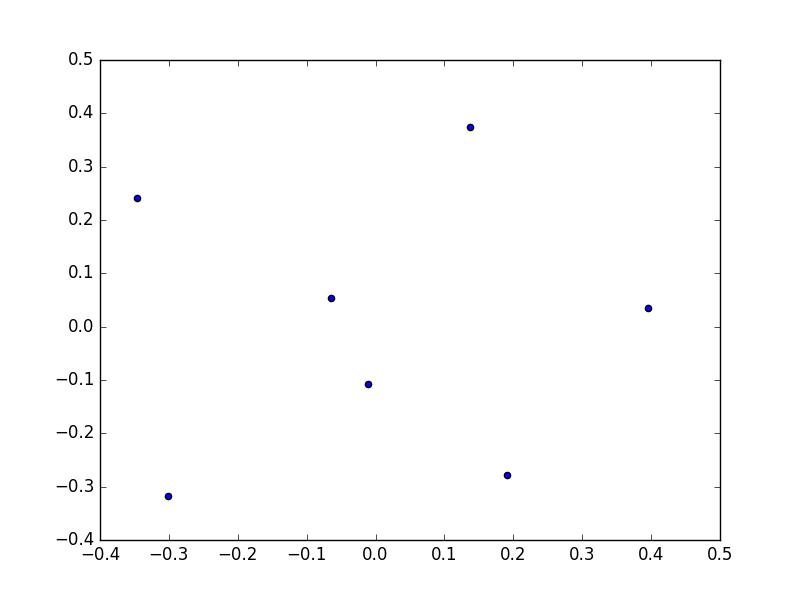

In [23]:
from IPython.display import Image
Image(filename='figure_1.png')

## 7. Next Steps

1. Find and compare the sentiment mean pattern for several novels.
2. Cluster novels based on content and then compare the sentiment pattern of novels with similar content.
3. Make code more elegant and functional.

## 8. Future

In the future I would like to be able to predict whether a novel based on how it is written will be popular or not.